In [65]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util

In [66]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [67]:
model = MultiPoleModel(moments=3, lrate=.0000000354, optimizer='sgd', loss='mse', scale=1e9, early_stop=False, target_stop=4)
test_epochs = 2000

In [68]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 37942.64
epoch  1 --- Loss --- 36802.457
epoch  2 --- Loss --- 35718.395
epoch  3 --- Loss --- 34687.152
epoch  4 --- Loss --- 33705.625
epoch  5 --- Loss --- 32770.867
epoch  6 --- Loss --- 31880.08
epoch  7 --- Loss --- 31030.574
epoch  8 --- Loss --- 30219.775
epoch  9 --- Loss --- 29445.176
epoch  10 --- Loss --- 28704.365
epoch  11 --- Loss --- 27994.969
epoch  12 --- Loss --- 27314.693
epoch  13 --- Loss --- 26661.266
epoch  14 --- Loss --- 26032.455
epoch  15 --- Loss --- 25426.057
epoch  16 --- Loss --- 24839.867
epoch  17 --- Loss --- 24271.695
epoch  18 --- Loss --- 23719.322
epoch  19 --- Loss --- 23180.48
epoch  20 --- Loss --- 22652.84
epoch  21 --- Loss --- 22133.967
epoch  22 --- Loss --- 21621.28
epoch  23 --- Loss --- 21112.006
epoch  24 --- Loss --- 20603.11
epoch  25 --- Loss --- 20091.236
epoch  26 --- Loss --- 19572.617
epoch  27 --- Loss --- 19042.957
epoch  28 --- Loss --- 18497.35
epoch  29 --- Loss --- 17930.137
epoch  30 --- Loss --- 1733

In [69]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 75.60933044751485 minutes


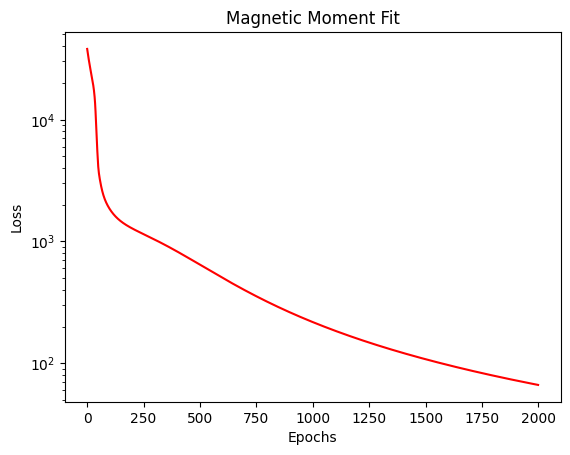

In [70]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [71]:
model.moment()

---- Moment  0 -----
Position:  [[ 0.51890993 -0.01458661 -0.0321294 ]]
Value:     [[0.8068524  0.0831383  0.25040013]]
---- Moment  1 -----
Position:  [[-0.0519111 -0.1271115  0.2177136]]
Value:     [[-0.0235308   0.16901436  1.8438772 ]]
---- Moment  2 -----
Position:  [[-0.03316146  0.28605086 -0.04229807]]
Value:     [[0.16574237 1.4866405  0.7899865 ]]
